# Random Forest para Identificar periodos importantes
Prof. Fernando Amaral

In [1]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas import Series
import numpy as np

In [2]:
d = pd.read_csv("AirPassengers.csv", header=0, parse_dates=[0], index_col=0).squeeze("columns")
d

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [3]:
differenced = d.diff(12)
differenced.head(n=13)

Month
1949-01-01    NaN
1949-02-01    NaN
1949-03-01    NaN
1949-04-01    NaN
1949-05-01    NaN
1949-06-01    NaN
1949-07-01    NaN
1949-08-01    NaN
1949-09-01    NaN
1949-10-01    NaN
1949-11-01    NaN
1949-12-01    NaN
1950-01-01    3.0
Name: #Passengers, dtype: float64

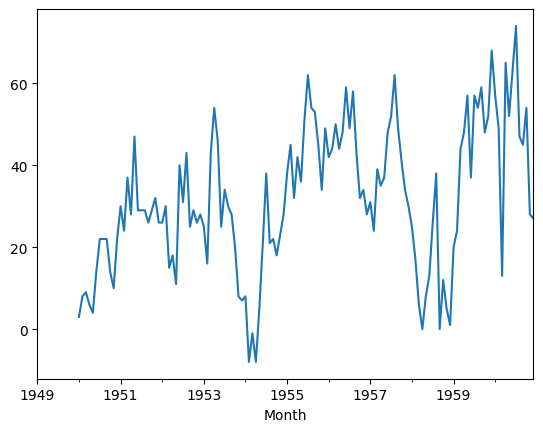

In [4]:
differenced.plot()
pyplot.show()

In [5]:
differenced = differenced[12:]

In [6]:
differenced.head(n=13)

Month
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
1950-06-01    14.0
1950-07-01    22.0
1950-08-01    22.0
1950-09-01    22.0
1950-10-01    14.0
1950-11-01    10.0
1950-12-01    22.0
1951-01-01    30.0
Name: #Passengers, dtype: float64

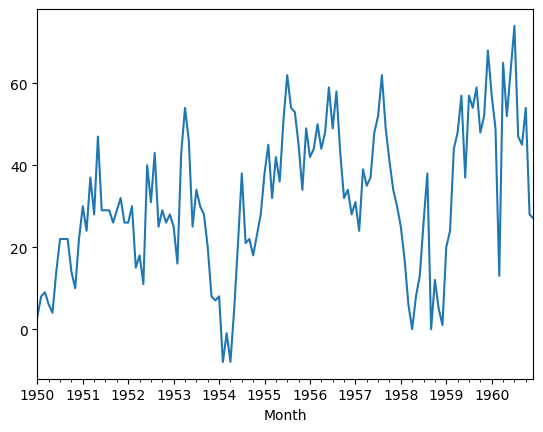

In [7]:
differenced.plot()
pyplot.show()

In [8]:
dataframe = pd.DataFrame()
for i in range(12, 0, -1):
    dataframe['t-'+str(i)] = differenced.shift(i)
dataframe['t'] = differenced.values

dataframe = dataframe[12:]

In [9]:
dataframe

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
Month,,,,,,,,,,,,,
1951-01-01,3.0,8.0,9.0,6.0,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0
1951-02-01,8.0,9.0,6.0,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0
1951-03-01,9.0,6.0,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0
1951-04-01,6.0,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0,28.0
1951-05-01,4.0,14.0,22.0,22.0,22.0,14.0,10.0,22.0,30.0,24.0,37.0,28.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,54.0,59.0,48.0,52.0,68.0,57.0,49.0,13.0,65.0,52.0,63.0,74.0,47.0
1960-09-01,59.0,48.0,52.0,68.0,57.0,49.0,13.0,65.0,52.0,63.0,74.0,47.0,45.0
1960-10-01,48.0,52.0,68.0,57.0,49.0,13.0,65.0,52.0,63.0,74.0,47.0,45.0,54.0


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
array = dataframe.values
X = array[:,0:-1]
y = array[:,-1]

In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(n_estimators=500, random_state=1)

In [14]:
print(model.feature_importances_)

[0.03927446 0.03431069 0.02323917 0.02286706 0.02760208 0.03120079
 0.03254103 0.02772393 0.04478567 0.0483857  0.18464247 0.48342695]


In [15]:
rankings = len(model.feature_importances_) - np.argsort(model.feature_importances_).argsort()
print("Rankings:", rankings)

Rankings: [ 5  6 11 12 10  8  7  9  4  3  2  1]


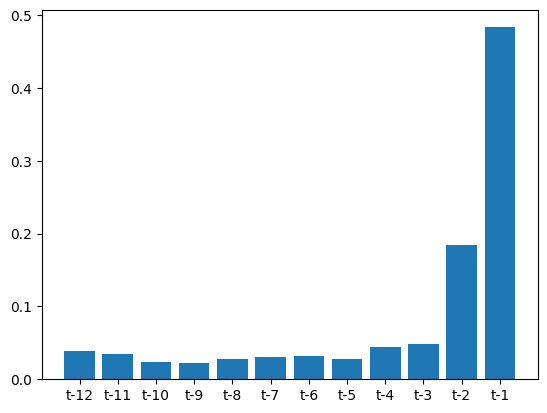

In [16]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [17]:
from sklearn.feature_selection import RFE

In [18]:
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1))
fit = rfe.fit(X, y)

In [19]:
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

t-12
t-11
t-4
t-3
t-2
t-1
